# Práctica 1: Introducción al color 
- Martínez Ostoa Néstor Iván
- #315618648
---
**Visualización de la Información**

Licenciatura en Ciencia de Datos

IIMAS, UNAM

## Primera Parte

Esta primer parte consiste de generar imágenes en diferentes escalas y con gradientes. 

In [1]:
"""
Liberías necesarias
"""
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
class GradientPosition(Enum):
    """
        Enumeración para evitar errores en el posicionamiento del gradiente
    """
    LEFT    = 1
    TOP     = 0
    RIGHT   = 3
    BOTTOM  = 2

class Color(Enum):
    """
        Enumeración para los colores principales en el cubo RGB
    """
    RED     = (1.,0.,0.)
    GREEN   = (0.,1.,0.)
    BLUE    = (0.,0.,1.)
    CYAN    = (0.,1.,1.)
    MAGENTA = (1.,0.,1.)
    YELLOW  = (1.,1.,0.)
    GRAY    = (0.8,0.8,0.8)
    WHITE   = (1., 1., 1.)

In [3]:
class MatrixFrame:
    """
    """
    def __init__(self, frames):
        self.nrows  = frames.shape[0]
        self.ncols  = frames.shape[1]
        self.frames = frames

    def show(self, display_title=True):
        fig, axs = plt.subplots(nrows=self.nrows, ncols=self.ncols)
        fig.set_figheight(10)
        fig.set_figwidth(10)
        fig.tight_layout()
        for row in range(self.nrows):
            for col in range(self.ncols):
                frame = self.frames[row, col]
                axs[row, col].imshow(frame.img_array)
                axs[row, col].axis('off')
                if display_title:
                    axs[row, col].set_title(frame.color.name.capitalize())
        plt.show()

In [4]:
class Frame:
    """
        Clase que representa un Frame compuesto por un color, posible gradiente
        y resolución (altura, ancho)
    """
    def __init__(self, color, gradient=None, height=64, width=64):
        self.color     = color
        self.gradient  = gradient
        self.height    = height
        self.width     = width
        self.img_array = self._generate_img_array()

    def _generate_img_array(self):
        if self.gradient is None:
            return np.full((self.height, self.width, 3), self.color.value)
        return self._build_gradient()

    def _build_gradient(self):
        M = self.height
        N = self.width
        if self.color == Color.GRAY:
            red = green = blue = self.color.value[0]
        else:
            red   = 1 if self.color.value[0] == 1 else 0 
            green = 1 if self.color.value[1] == 1 else 0 
            blue  = 1 if self.color.value[2] == 1 else 0 
        r = np.linspace(0, red, M, dtype=np.float)
        g = np.linspace(0, green, M, dtype=np.float)
        b = np.linspace(0, blue, M, dtype=np.float)
        C = zip(r,g,b)
        X = np.array([c for c in C])
        img_matrix = np.array([[x for _ in range(N)] for x in X]).reshape(M, N, 3)
        for _ in range(self.gradient.value):
            img_matrix = np.rot90(img_matrix)
        return img_matrix
        

    def show(self, display_title=True):
        """
            Función encargada de desplegar la imagen generada a partir de una matriz con valores RGB

            Parámetros:
            -----------
            img_array: ndarray
                Matriz de MxN con una tupla de tres valores (R,G,B)

            [title]: str
                Título opcional de la gráfica

            Regresa:
            -------- 
            None
        """
        if display_title:
            plt.title(self.color.name.capitalize())
        plt.axis('off')
        plt.imshow(self.img_array)
        plt.show()


In [5]:
class BasicFrame:
    def __init__(self, color):
        self.color = color
        self.img_array = np.full((64, 64, 3), self.color)

    def show(self):
        plt.axis('off')
        plt.imshow(self.img_array)
        plt.show()

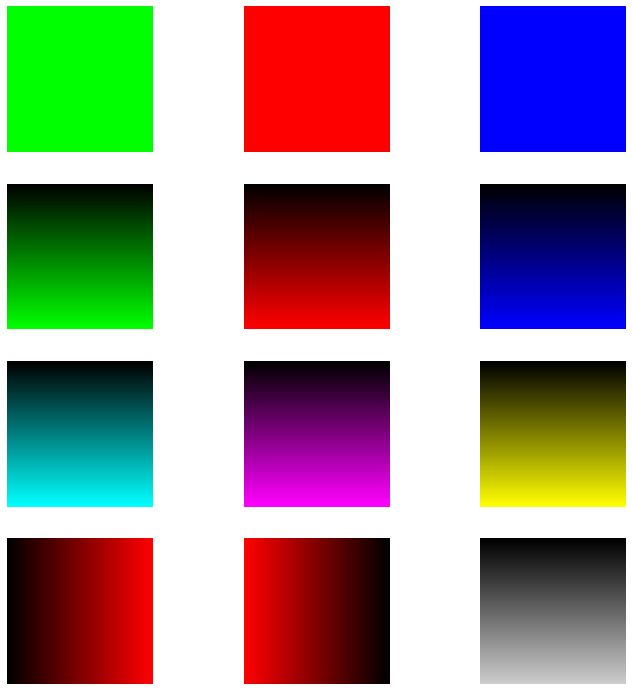

In [6]:
frames = np.array([
    [Frame(Color.GREEN), Frame(Color.RED), Frame(Color.BLUE)],
    [Frame(Color.GREEN, gradient=GradientPosition.TOP), Frame(Color.RED, gradient=GradientPosition.TOP), Frame(Color.BLUE, gradient=GradientPosition.TOP)],
    [Frame(Color.CYAN, gradient=GradientPosition.TOP), Frame(Color.MAGENTA, gradient=GradientPosition.TOP), Frame(Color.YELLOW, gradient=GradientPosition.TOP)],
    [Frame(Color.RED, gradient=GradientPosition.LEFT), Frame(Color.RED, gradient=GradientPosition.RIGHT), Frame(Color.GRAY, gradient=GradientPosition.TOP)],
])
matrix = MatrixFrame(frames)
matrix.show(False)

## Segunda Parte
Generación de círculos concéntricos

In [15]:
def random_color():
    r = np.round(np.random.uniform(0,1),3)
    g = np.round(np.random.uniform(0,1),3)
    b = np.round(np.random.uniform(0,1),3)
    return (r,g,b)

def concentric_circle(radius, color=None, x=0.5, y=0.5):
    if color is None:
        return plt.Circle((x, y), radius, fc=random_color())
    return plt.Circle((x, y), radius, fc=color)

def draw_circles():
    ninner = 4
    radiuses = np.linspace(0.1, 0.5, ninner)[::-1]
    circles = [concentric_circle(r) for r in radiuses]
    fig, axes = plt.subplots(figsize=(3,6))
    axes.set_aspect(1)
    fig.patch.set_facecolor('black')
    axes.axis('off')
    for c in circles:
        axes.add_artist(c)
    plt.show()
    

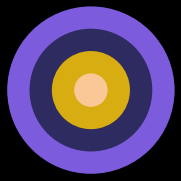

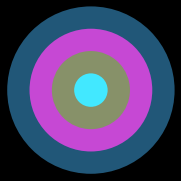

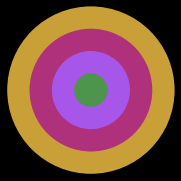

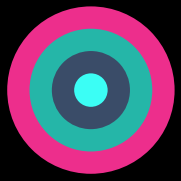

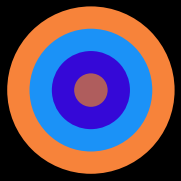

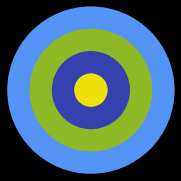

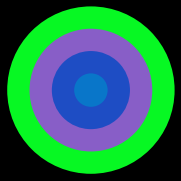

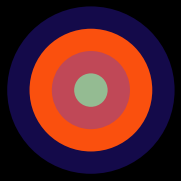

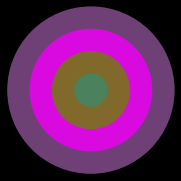

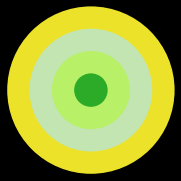

In [74]:
for _ in range(10): draw_circles()

**1.¿Qué se puede decir sobre la visibilidad de cada uno de los círculos generados usando colores de forma aleatoria?**

De manera general, unos sí tienen un buen contraste en donde se alcanza a ver claramente la distinción de todos los círculos; sin embargo, por ser colores aleatorios, algunos se pierden y no se alcanazan a distinguir todos los colores. Después de correr el programa, ocasionalmente aparecen combinaciones de colores muy estéticas, en donde, a parte de tener una clara distinción, los círculos son llamativos. 

**2.¿Cómo puede maximizar el contraste entre círculos contiguos?**

Con base en los experimentos realizados, encontré dos formas principales: 

- Por un lado, se puede tomar un mismo color (hue) e ir decrementando significativamente la saturación. Si los cambios en saturación son muy bajos, los círculos concéntricos no se alcanzarán a distinguir. Sin embargo, esta forma de generar los círculos es la menos efectiva pero una de las más estéticas. 
    
- Por otro lado, tomando como referencia el círculo cromático, los círculos concéntricos con mayor contraste son aquellos en los cuales tenemos colores que son opuestos (por ejemplo, rojo con cyan). De igual forma, se pueden tomar colores complementarios (naranja-azul, amarillo-morado, rojo-verde). Estas dos combinaciones son las que maximizan el contraste. 


De manera general, el contraste de los colores dentro de los círculos está determinado por la posición de los colores dentro del círculo cromático. Mientras más alejados sean los colores uno de otro, el contraste será mayor. Sin embargo, si tenemos colores cercanos, la diferencia en saturación e iluminación (HSI) entre estos dos colores deberá ser la mayor posible, de lo contrario, el contraste será mínimo

## Tercera Parte
Función para convertir entre los espacios de color RGB y HSI

In [9]:
def convert_to_hsi(image):
    if image.shape[2] == 4:
        image = image[:, :, :-1]
    if len(image[image > 1]) == 0:
        img = np.copy(image)
    else:
        img = image/255
    M = img.shape[0]
    N = img.shape[1]
    for row in range(M):
        for col in range(N):
            r = img[row][col][0]
            g = img[row][col][1]
            b = img[row][col][2]
            (nr, ng, nb) = rgb_to_hsi(r,g,b)
            img[row][col] = (abs(nr), abs(ng), abs(nb))
    return img

In [10]:
def show_hsi_from(rgb_img):
    hsi_img = convert_to_hsi(rgb_img)
    fig, axes = plt.subplots(ncols=2, figsize=(10,10))
    axes[0].imshow(rgb_img)
    axes[0].axis('off')
    axes[0].set_title('RGB')
    axes[1].imshow(hsi_img)
    axes[1].axis('off')
    axes[1].set_title('HSI')
    plt.show()

def to_hsi(path):
    with cbook.get_sample_data(path) as img_file:
        rgb_img = plt.imread(img_file)
    show_hsi_from(rgb_img)

def get_img_matrix(path):
    with cbook.get_sample_data(path) as img_file:
        rgb_img = plt.imread(img_file)
        return rgb_img
    return None

In [11]:
def S(r,g,b):
    if r+g+b == 0:
        return 0
    return 1 - (3*min(r,g,b))/(r+g+b)

def I(r,g,b):
    return (r+g+b)/3

def _theta(r,g,b):
    p = 0.5*((r-g)+(r-b))
    q = np.sqrt((r-g)**2 + (r-b)*(g-b))
    if q == 0:
        rad = np.arccos(0)
    else:
        rad = np.arccos(p/q)
    return rad*(180/np.pi)

def H(r,g,b):
    theta = _theta(r,g,b)
    if b <= g:
        return theta
    return 360 - theta

def rgb_to_hsi(r,g,b):
    return (H(r,g,b)/360, S(r,g,b), I(r,g,b))

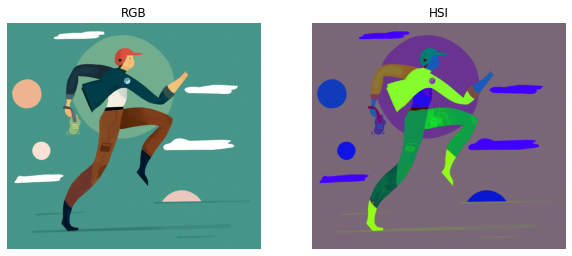

In [12]:
to_hsi('/home/nestor/Desktop/iimas-data-science/2021-2/vi/practicas/1/space_cadet.jpg')

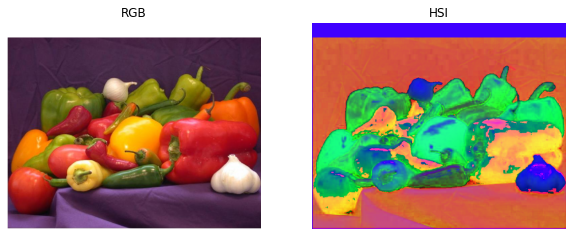

In [13]:
to_hsi('/home/nestor/Desktop/iimas-data-science/2021-2/vi/practicas/1/vegetables.png')

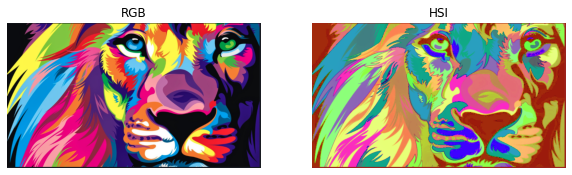

In [14]:
to_hsi('/home/nestor/Desktop/iimas-data-science/2021-2/vi/practicas/1/lion.png')